In [1]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Add the project root directory to the Python path
project_root = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, project_root)

# Print the project root to verify
print(f"Project root: {project_root}")

Project root: D:\GitHub\price-move-predictor-with-news-sentiment-week1


In [2]:
from src.financial_news.data_load import DataLoad
from src.financial_news.analysis import Analysis
from src.financial_news.visualization import Visualization
from src.stock.analysis import StockAnalysis
from src.stock.visualization import StockVisualization

# Initialize classes
data_loader = DataLoad()
analyzer = Analysis()
visualizer = Visualization()
stock_analyzer = StockAnalysis()
stock_visualizer = StockVisualization()

#let's load the data for both the news and the stock data
news_data = data_loader.load_dataset('../data/raw_analyst_ratings.csv')

In [3]:
import pandas as pd
# want to fix the dates and adjust it to utc format
news_data['date'] = pd.to_datetime(news_data['date'], utc=True, format='mixed').dt.date

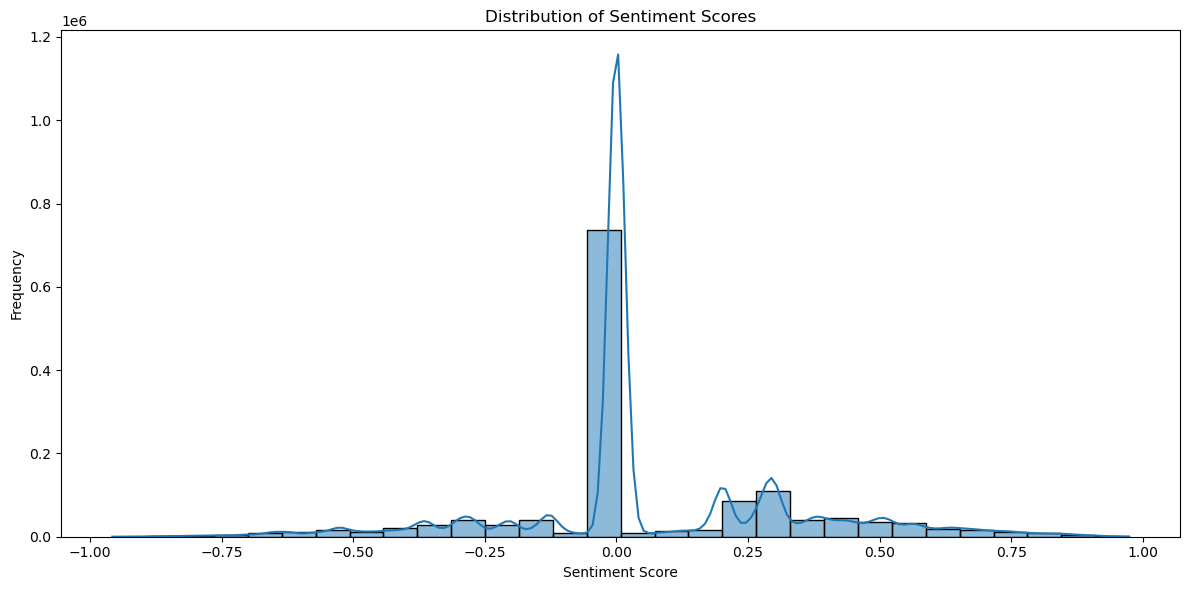

In [4]:
#let's do the sentiment analysts on the headlines using nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
#apply the sentiment analysis to the headlines
news_data['sentiment'] = news_data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

#plot the distribution of the sentiment scores
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(news_data['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<bound method NDFrame.head of              date    Return
0      1980-12-12       NaN
1      1980-12-15 -0.052170
2      1980-12-16 -0.073398
3      1980-12-17  0.024751
4      1980-12-18  0.028992
...           ...       ...
11205  2025-05-29 -0.002345
11206  2025-05-30  0.004501
11207  2025-06-02  0.004232
11208  2025-06-03  0.007784
11209  2025-06-04 -0.002214

[11210 rows x 2 columns]>


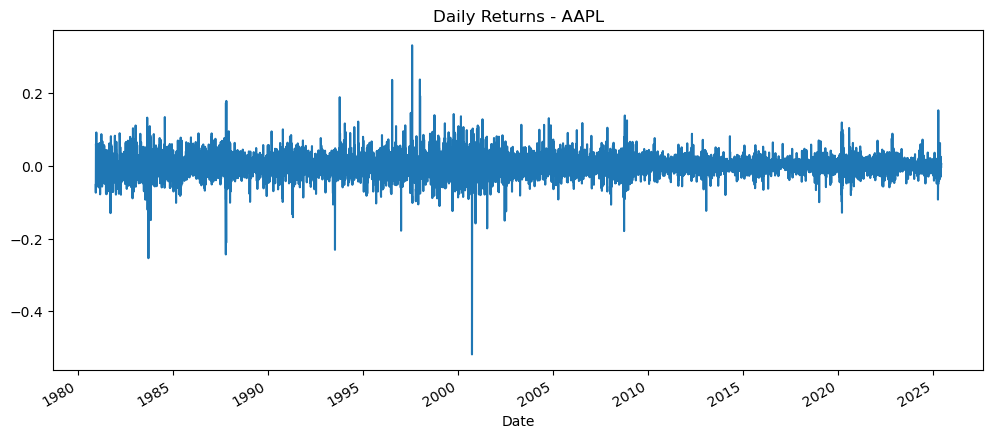

In [5]:
# analysis for AAPL
import yfinance as yf
#load data
stock_name = "AAPL"
stock_data = stock_analyzer.load_stock_data(stock_name)

#normalize the timestamp
stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True, format='mixed').dt.date

# stock returns
stock = yf.Ticker(stock_name)
returns = stock.history(period="max")['Close'].pct_change()

#plot the returns first
returns.plot(title=f"Daily Returns - {stock_name}", figsize=(12, 5))

#convert the return to dataframe and add the necessary columns like date and return pct
returns = returns.to_frame()
returns.reset_index(inplace=True)
returns.columns = ['date', 'Return']

#normalize the timeline
returns['date'] = pd.to_datetime(returns['date'], utc=True, format='mixed').dt.date

print(returns.head)

Pearson correlation between sentiment and returns: 0.0306
Correlation Matrix:
           sentiment    Return
sentiment   1.000000  0.030636
Return      0.030636  1.000000


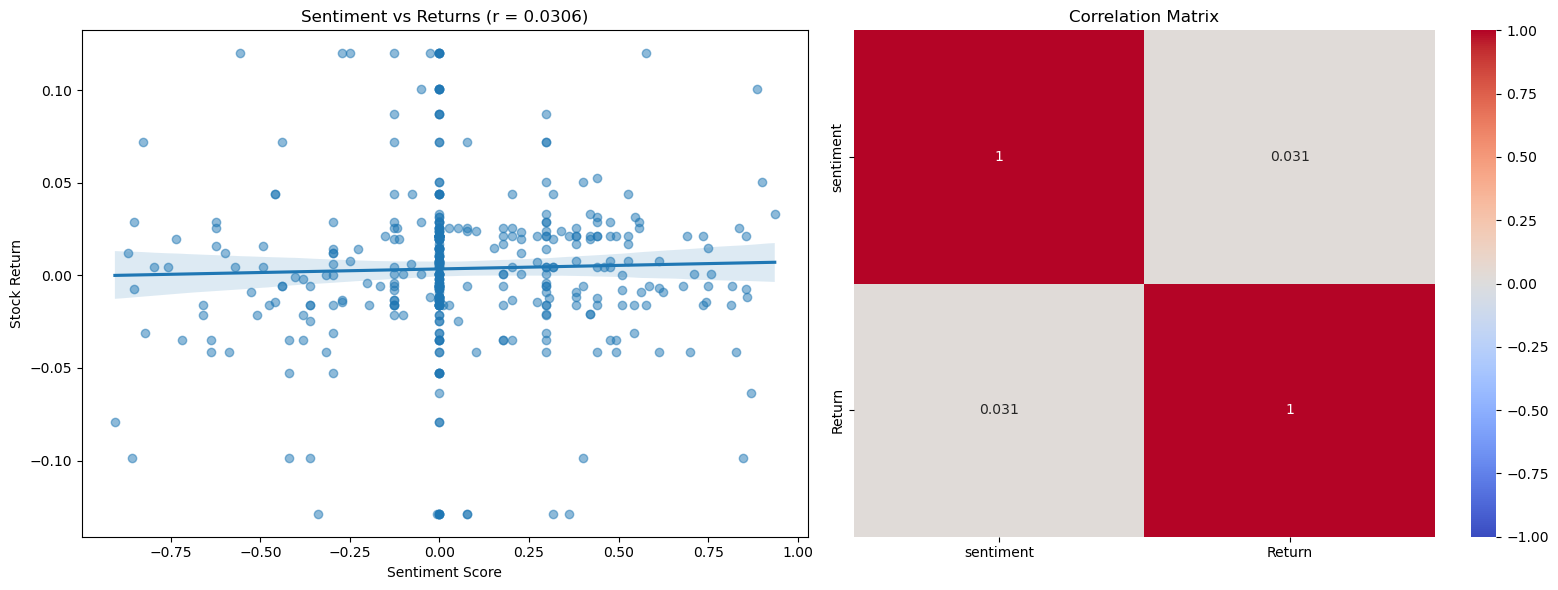

In [6]:
#merge the returns data with the news data for AAPL only
news_data_aapl = news_data[news_data['stock'] == 'AAPL']
news_data_merged = news_data_aapl.merge(returns, on='date', how='left')

# Calculate correlation using Pearson method
correlation = news_data_merged['Return'].corr(news_data_merged['sentiment'], method='pearson')
print(f"Pearson correlation between sentiment and returns: {correlation:.4f}")

# Create a correlation matrix
corr_data = news_data_merged[['sentiment', 'Return']].dropna()
correlation_matrix = corr_data.corr(method='pearson')
print("Correlation Matrix:")
print(correlation_matrix)

# Create a figure with scatter plot and correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix

# Set up the figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with regression line
sns.regplot(x='sentiment', y='Return', data=corr_data, ax=ax1, scatter_kws={'alpha':0.5})
ax1.set_title(f'Sentiment vs Returns (r = {correlation:.4f})')
ax1.set_xlabel('Sentiment Score')
ax1.set_ylabel('Stock Return')

# Correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax2)
ax2.set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

Pearson correlation between sentiment and returns: 0.1067
Correlation Matrix:
           sentiment    Return
sentiment   1.000000  0.106662
Return      0.106662  1.000000


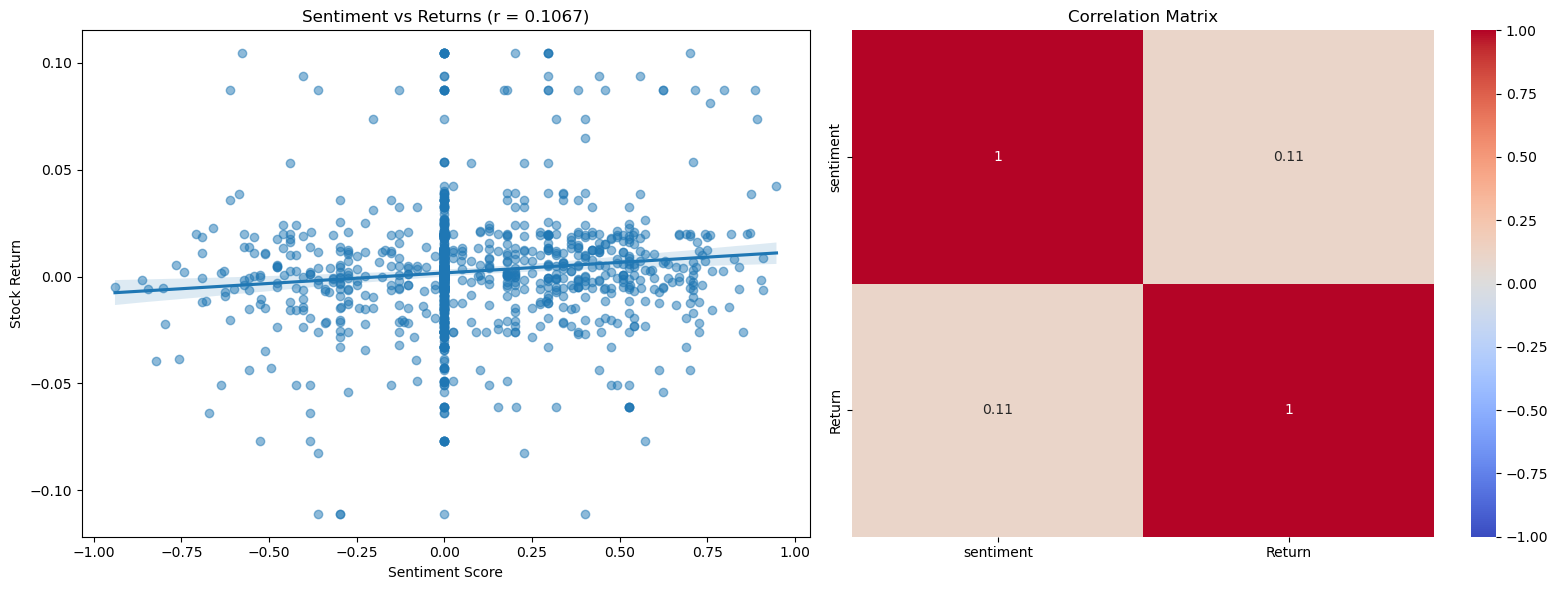

In [7]:
# for Google (GOOG)
stock_name = "GOOG"
stock_data = stock_analyzer.load_stock_data(stock_name)

#normalize the timestamp
stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True, format='mixed').dt.date

# stock returns
stock = yf.Ticker(stock_name)
returns = stock.history(period="max")['Close'].pct_change()

#convert the return to dataframe and add the necessary columns like date and return pct
returns = returns.to_frame()
returns.reset_index(inplace=True)
returns.columns = ['date', 'Return']

#normalize the timeline
returns['date'] = pd.to_datetime(returns['date'], utc=True, format='mixed').dt.date

#merge the returns data with the news data for GOOG only    
news_data_goog = news_data[news_data['stock'] == 'GOOG']
news_data_merged = news_data_goog.merge(returns, on='date', how='left')

# Calculate correlation using Pearson method
correlation = news_data_merged['Return'].corr(news_data_merged['sentiment'], method='pearson')
print(f"Pearson correlation between sentiment and returns: {correlation:.4f}")

# Create a correlation matrix
corr_data = news_data_merged[['sentiment', 'Return']].dropna()
correlation_matrix = corr_data.corr(method='pearson')
print("Correlation Matrix:")
print(correlation_matrix)

# Create a figure with scatter plot and correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix

# Set up the figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with regression line
sns.regplot(x='sentiment', y='Return', data=corr_data, ax=ax1, scatter_kws={'alpha':0.5})
ax1.set_title(f'Sentiment vs Returns (r = {correlation:.4f})')
ax1.set_xlabel('Sentiment Score')
ax1.set_ylabel('Stock Return')

# Correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax2)
ax2.set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

Pearson correlation between sentiment and returns: 0.0908
Correlation Matrix:
           sentiment    Return
sentiment   1.000000  0.090804
Return      0.090804  1.000000


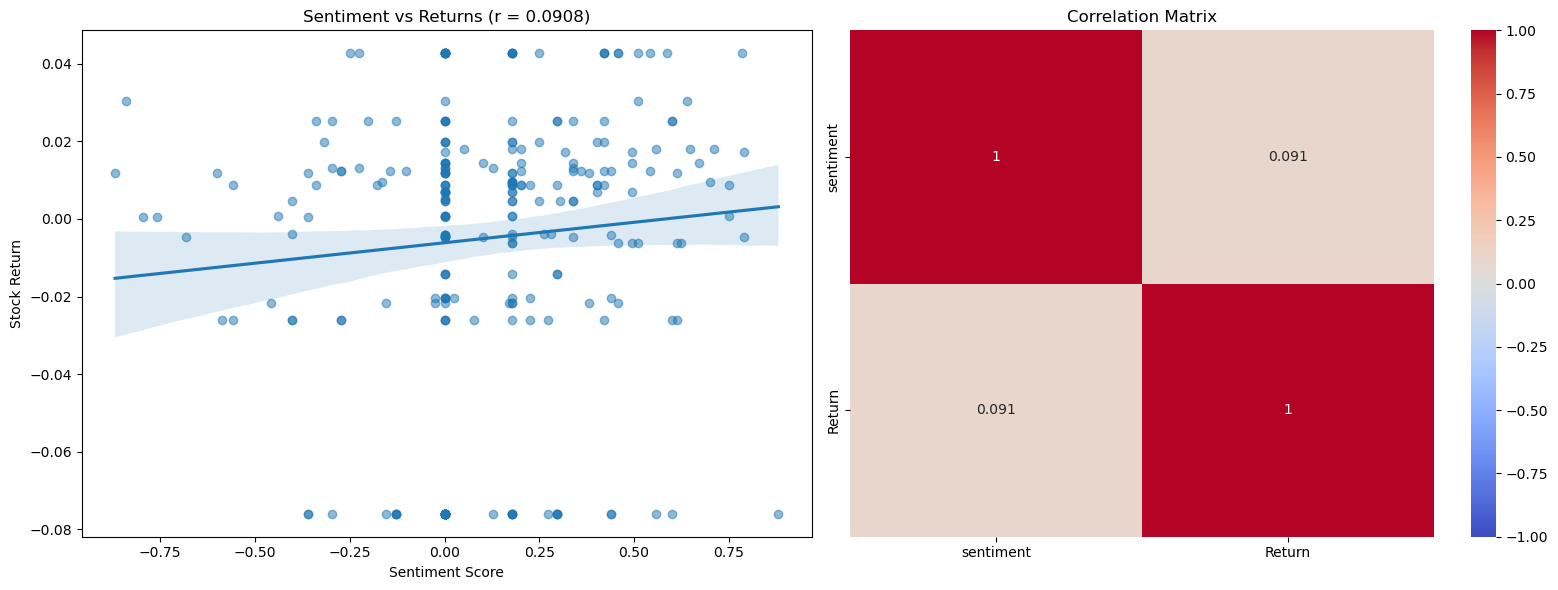

In [8]:
#for AMZN
stock_name = "AMZN"
stock_data = stock_analyzer.load_stock_data(stock_name)

#normalize the timestamp
stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True, format='mixed').dt.date

# stock returns
stock = yf.Ticker(stock_name)
returns = stock.history(period="max")['Close'].pct_change()

#convert the return to dataframe and add the necessary columns like date and return pct
returns = returns.to_frame()
returns.reset_index(inplace=True)
returns.columns = ['date', 'Return']

#normalize the timeline
returns['date'] = pd.to_datetime(returns['date'], utc=True, format='mixed').dt.date

#merge the returns data with the news data for AMZN only    
news_data_amzn = news_data[news_data['stock'] == 'AMZN']
news_data_merged = news_data_amzn.merge(returns, on='date', how='left')

# Calculate correlation using Pearson method
correlation = news_data_merged['Return'].corr(news_data_merged['sentiment'], method='pearson')
print(f"Pearson correlation between sentiment and returns: {correlation:.4f}")

# Create a correlation matrix
corr_data = news_data_merged[['sentiment', 'Return']].dropna()
correlation_matrix = corr_data.corr(method='pearson')
print("Correlation Matrix:")
print(correlation_matrix)

# Create a figure with scatter plot and correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix

# Set up the figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with regression line
sns.regplot(x='sentiment', y='Return', data=corr_data, ax=ax1, scatter_kws={'alpha':0.5})
ax1.set_title(f'Sentiment vs Returns (r = {correlation:.4f})')
ax1.set_xlabel('Sentiment Score')
ax1.set_ylabel('Stock Return')

# Correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax2)
ax2.set_title('Correlation Matrix')

plt.tight_layout()
plt.show()


Pearson correlation between sentiment and returns: 0.0735
Correlation Matrix:
           sentiment    Return
sentiment   1.000000  0.073453
Return      0.073453  1.000000


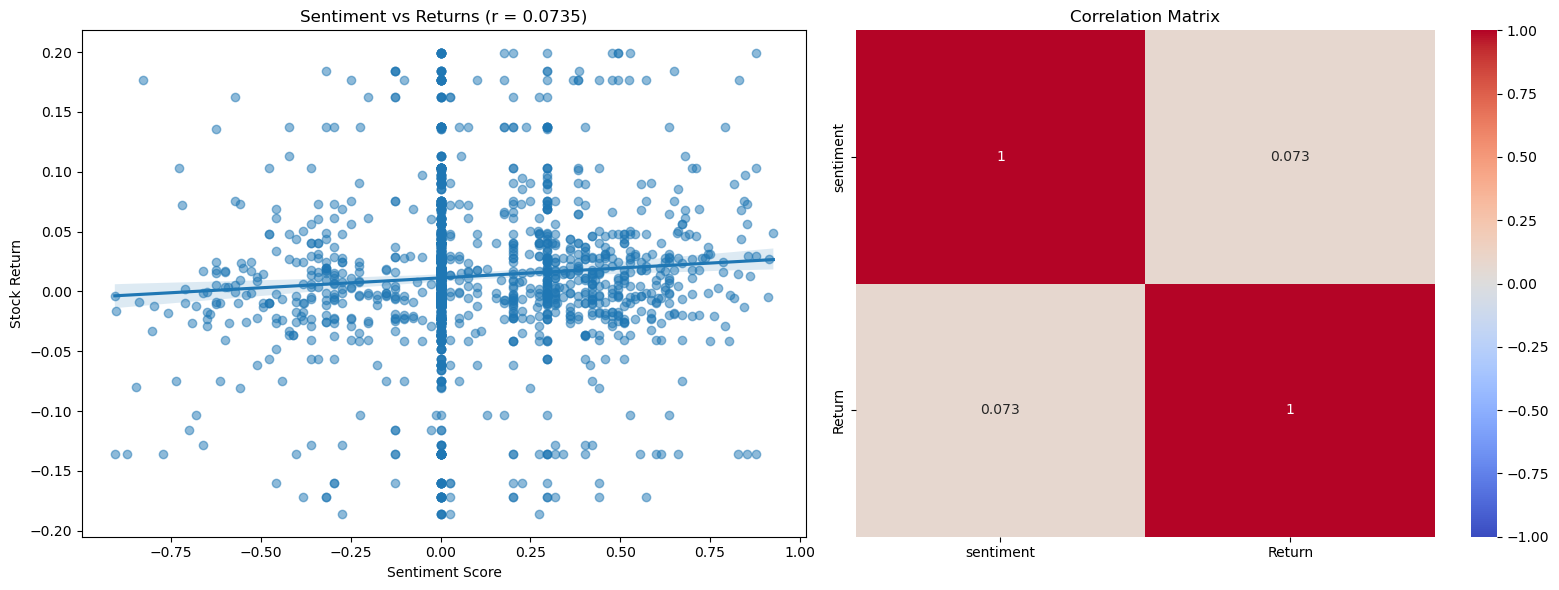

In [9]:
# for Tesla
stock_name = "TSLA"
stock_data = stock_analyzer.load_stock_data(stock_name)

#normalize the timestamp
stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True, format='mixed').dt.date

# stock returns
stock = yf.Ticker(stock_name)
returns = stock.history(period="max")['Close'].pct_change()

#convert the return to dataframe and add the necessary columns like date and return pct
returns = returns.to_frame()
returns.reset_index(inplace=True)
returns.columns = ['date', 'Return']

#normalize the timeline
returns['date'] = pd.to_datetime(returns['date'], utc=True, format='mixed').dt.date

#merge the returns data with the news data for TSLA only    
news_data_tsla = news_data[news_data['stock'] == 'TSLA']
news_data_merged = news_data_tsla.merge(returns, on='date', how='left')

# Calculate correlation using Pearson method
correlation = news_data_merged['Return'].corr(news_data_merged['sentiment'], method='pearson')
print(f"Pearson correlation between sentiment and returns: {correlation:.4f}")

# Create a correlation matrix
corr_data = news_data_merged[['sentiment', 'Return']].dropna()
correlation_matrix = corr_data.corr(method='pearson')
print("Correlation Matrix:")
print(correlation_matrix)

# Create a figure with scatter plot and correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix

# Set up the figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with regression line
sns.regplot(x='sentiment', y='Return', data=corr_data, ax=ax1, scatter_kws={'alpha':0.5})
ax1.set_title(f'Sentiment vs Returns (r = {correlation:.4f})')
ax1.set_xlabel('Sentiment Score')
ax1.set_ylabel('Stock Return')

# Correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax2)
ax2.set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

Pearson correlation between sentiment and returns: 0.1276
Correlation Matrix:
           sentiment    Return
sentiment   1.000000  0.127585
Return      0.127585  1.000000


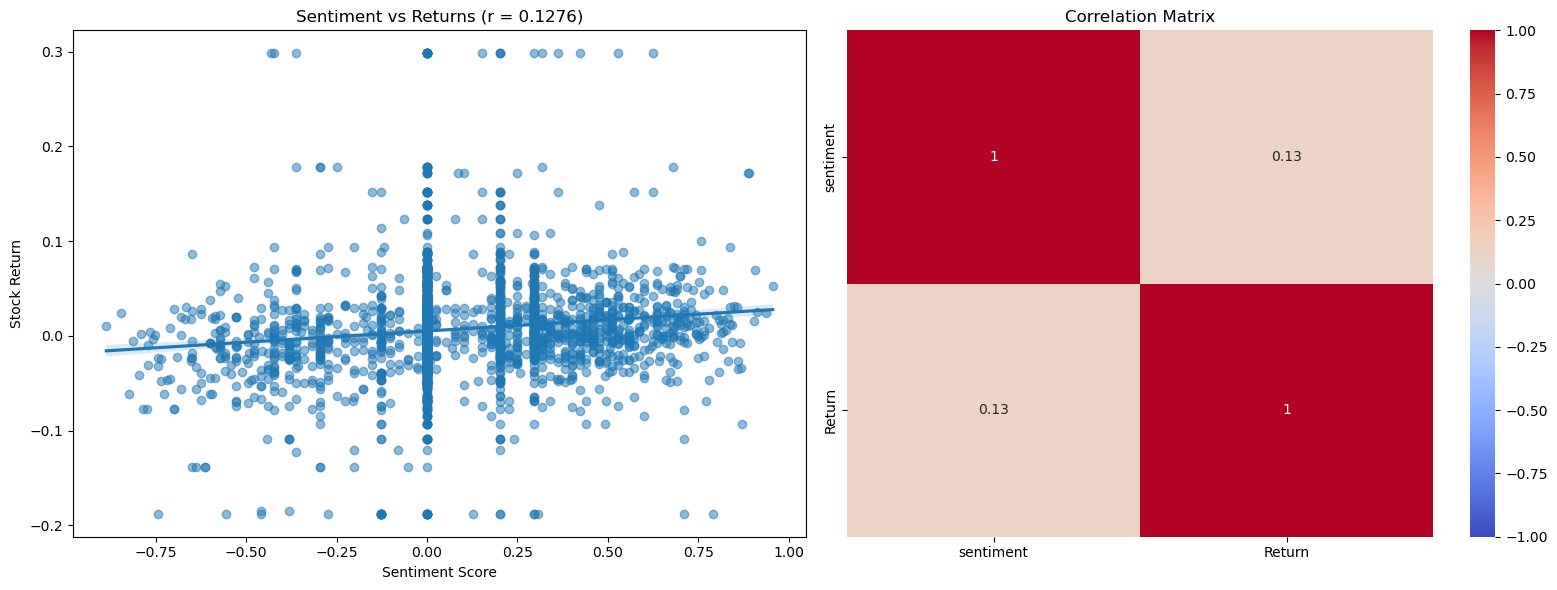

In [10]:
#NVIDIA

stock_name = "NVDA"
stock_data = stock_analyzer.load_stock_data(stock_name)

#normalize the timestamp
stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True, format='mixed').dt.date

# stock returns
stock = yf.Ticker(stock_name)
returns = stock.history(period="max")['Close'].pct_change()

#convert the return to dataframe and add the necessary columns like date and return pct
returns = returns.to_frame()
returns.reset_index(inplace=True)
returns.columns = ['date', 'Return']

#normalize the timeline
returns['date'] = pd.to_datetime(returns['date'], utc=True, format='mixed').dt.date

#merge the returns data with the news data for NVDA only    
news_data_nvda = news_data[news_data['stock'] == 'NVDA']
news_data_merged = news_data_nvda.merge(returns, on='date', how='left')

# Calculate correlation using Pearson method
correlation = news_data_merged['Return'].corr(news_data_merged['sentiment'], method='pearson')
print(f"Pearson correlation between sentiment and returns: {correlation:.4f}")

# Create a correlation matrix
corr_data = news_data_merged[['sentiment', 'Return']].dropna()
correlation_matrix = corr_data.corr(method='pearson')
print("Correlation Matrix:")
print(correlation_matrix)

# Create a figure with scatter plot and correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix

# Set up the figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with regression line
sns.regplot(x='sentiment', y='Return', data=corr_data, ax=ax1, scatter_kws={'alpha':0.5})
ax1.set_title(f'Sentiment vs Returns (r = {correlation:.4f})')
ax1.set_xlabel('Sentiment Score')
ax1.set_ylabel('Stock Return')

# Correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax2)
ax2.set_title('Correlation Matrix')

plt.tight_layout()
plt.show()